In [111]:
#2.Đọc dữ liệu từ file đó và chuyển 2 cột Height và Weight từ inch và pound về cm và kg. In ra Head().  Dùng Lambda.
import pandas as pd
data=pd.read_csv('weight-height.csv')
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [112]:
data['Height']=data['Height'].apply(lambda  x :x*2.54)
data['Weight']=data['Weight'].apply(lambda  x:x*0.45359237)
data.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
5,Male,170.822660,69.042272
6,Male,174.714106,83.428287
7,Male,173.605229,76.190414
8,Male,170.228132,79.800252
9,Male,161.179495,70.941700


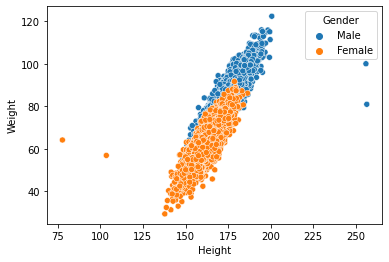

In [113]:
#3. dữ liệu lên trục toạ độ với 2 màu sắc khác nhau biểu thị cho 2 giới tính.
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=data['Height'],y=data['Weight'],hue='Gender',data=data);
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

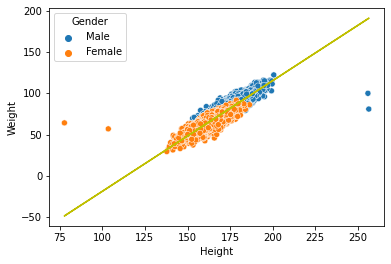

In [114]:
#4.Tạo mô hình Hồi quy tuyến tính cho tập dữ liệu trên. Với đầu vào là chiều cao, dữ liệu nhãn là cân nặng.
import numpy as np
from sklearn.linear_model import LinearRegression
# number of observations/points
n = np.size(data['Height'])
area = 50
reg = LinearRegression().fit(data['Height'].values.reshape(-1,1), data['Weight'])
# plot data points
sns.scatterplot(x=data['Height'],y=data['Weight'],hue='Gender', data=data);
# predicted response vector
y_pred = reg.intercept_ + reg.coef_[0]*data['Height']
# plotting the regression line
plt.plot(data['Height'], y_pred, color = "y")
# putting labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [115]:
#5.Tìm  toạ độ nhiễu, in ra và loại bỏ nhiễu. 
w1 = reg.coef_[0]
w0 = reg.intercept_
data['ERROR'] = abs(data['Weight'] - w0 - w1*data['Height'])
healthyArea = (sum(data['ERROR']) / len(data['ERROR'])) * 3
err = data[data['ERROR'] > healthyArea]
unerr = data[data['ERROR'] <= healthyArea]
print('Vùng bị nhiễu: \n', err)
print('Loại bỏ nhiễu: \n', unerr)

Vùng bị nhiễu: 
       Gender      Height      Weight      ERROR
67      Male  255.944040  100.097876  90.563456
78      Male  168.942074   89.108158  15.385806
86      Male  169.154339   94.504017  20.496361
159     Male  165.655182   84.126774  14.822320
160     Male  163.407466   80.509834  14.226526
...      ...         ...         ...        ...
9774  Female  167.174298   50.116735  21.229556
9902  Female  166.154081   56.145098  13.829924
9919  Female  169.648103   58.703710  15.967613
9975  Female  168.279885   56.254488  16.577818
9991  Female  159.097154   46.653592  13.836245

[162 rows x 4 columns]
Loại bỏ nhiễu: 
       Gender      Height      Weight      ERROR
0       Male  187.571423  109.721075  10.959092
1       Male  174.706036   73.622792   7.846878
2       Male  188.239668   96.497629   3.162538
3       Male  182.196685   99.809586   8.271766
4       Male  177.499761   93.598695   8.373991
...      ...         ...         ...        ...
9995  Female  168.078536   62.

In [116]:
#6.Chia dữ liệu thành 2 phần train_set (80%) và test_set (20%) chia đều cho cả 2 giới tính. (in ra shape của 4 biến)
train_set = data[0:3000].append(data[4000:9000])
test_set  = data[3000:4000].append(data[9000:10000])
print('train_set: \n',train_set)
print('test_set: \n',test_set)

train_set: 
       Gender      Height      Weight      ERROR
0       Male  187.571423  109.721075  10.959092
1       Male  174.706036   73.622792   7.846878
2       Male  188.239668   96.497629   3.162538
3       Male  182.196685   99.809586   8.271766
4       Male  177.499761   93.598695   8.373991
...      ...         ...         ...        ...
8995  Female  156.251928   60.317814   3.652235
8996  Female  159.453903   55.233039   5.736302
8997  Female  168.181746   78.645075   5.944678
8998  Female  174.351573   68.582768  12.410469
8999  Female  160.772475   62.559367   0.182261

[8000 rows x 4 columns]
test_set: 
       Gender      Height     Weight      ERROR
3000    Male  172.167952  86.141578   8.083337
3001    Male  172.803587  82.890359   3.977763
3002    Male  168.981796  74.717974   0.942232
3003    Male  176.169260  91.145720   7.709337
3004    Male  167.327422  79.061716   7.509611
...      ...         ...        ...        ...
9995  Female  168.078536  62.041210  10.52046

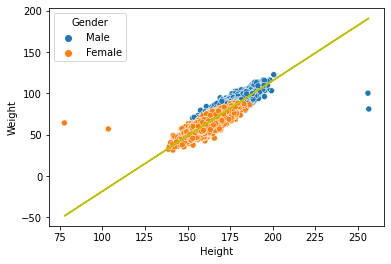

R2 score: 0.8326198784839222


In [117]:
#7.Tạo mô hình Hồi quy tuyến tính cho tập train_set và tính R2_score.
from sklearn.metrics import r2_score
sns.scatterplot(x=train_set['Height'],y=train_set['Weight'],hue='Gender', data=data);
reg = LinearRegression().fit(train_set['Height'].values.reshape(-1,1),train_set['Weight'])
# predicted response vector
y_pred = reg.intercept_ + reg.coef_[0]*train_set['Height']
# plotting the regression line
plt.plot(train_set['Height'], y_pred, color = "y")
# putting labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()
r2Score = r2_score(train_set['Weight'], y_pred)
print('R2 score:', r2Score)

In [118]:
#8.Tính điểm R2_score cho tập test_set.
x=test_set['Height']
y=test_set['Weight']
reg = LinearRegression().fit(x.values.reshape(-1,1), y)
# predicted response vector
y_pred = reg.intercept_ + reg.coef_[0]*x
r2Score = r2_score(y, y_pred)
print('R2 score:', r2Score)

R2 score: 0.8541264707418985


In [121]:
#9.Viết Hàm để nhập chiều cao, cân nặng sau đó dự đoán tình trạng người đó như thế nào, dựa trên ERROR, nếu error càng thấp thì cơ thể càng cân đối.
print("weight: ")
weight =int(input())
print("Hight: ")
height =int(input())
errPoint = abs(weight - w0 - w1*height)
if errPoint > healthyArea :
    print("K can doi")
else:
    print("Can doi")

weight: 
241
Hight: 
73
K can doi
